# Applying machine learning alogrithm after data collection, data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/PawanKumar/ML Notes/AQI Project/Data/Real-Data/final_data_list.csv')

In [7]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,8.9,15.0,5.0,93.0,0.5,4.8,11.1,284.795833
1,6.6,10.0,3.0,99.0,0.6,8.1,13.0,182.187500
2,7.8,14.0,3.0,79.0,1.6,11.7,18.3,223.208333
3,13.4,29.0,7.0,55.0,2.4,11.9,22.2,200.645833
4,15.2,21.0,10.0,88.0,0.6,8.9,18.3,285.225000


In [23]:
# Check for null values
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    1
dtype: int64

In [24]:
# Since we do not having to much of null values hence we will rather be dropping the null.
df = df.dropna()

In [25]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

In [38]:
# Now making dependent and independent values
X = df.iloc[:, :-1]  #Independent Feature
y = df.iloc[:, -1] #Dependent feature

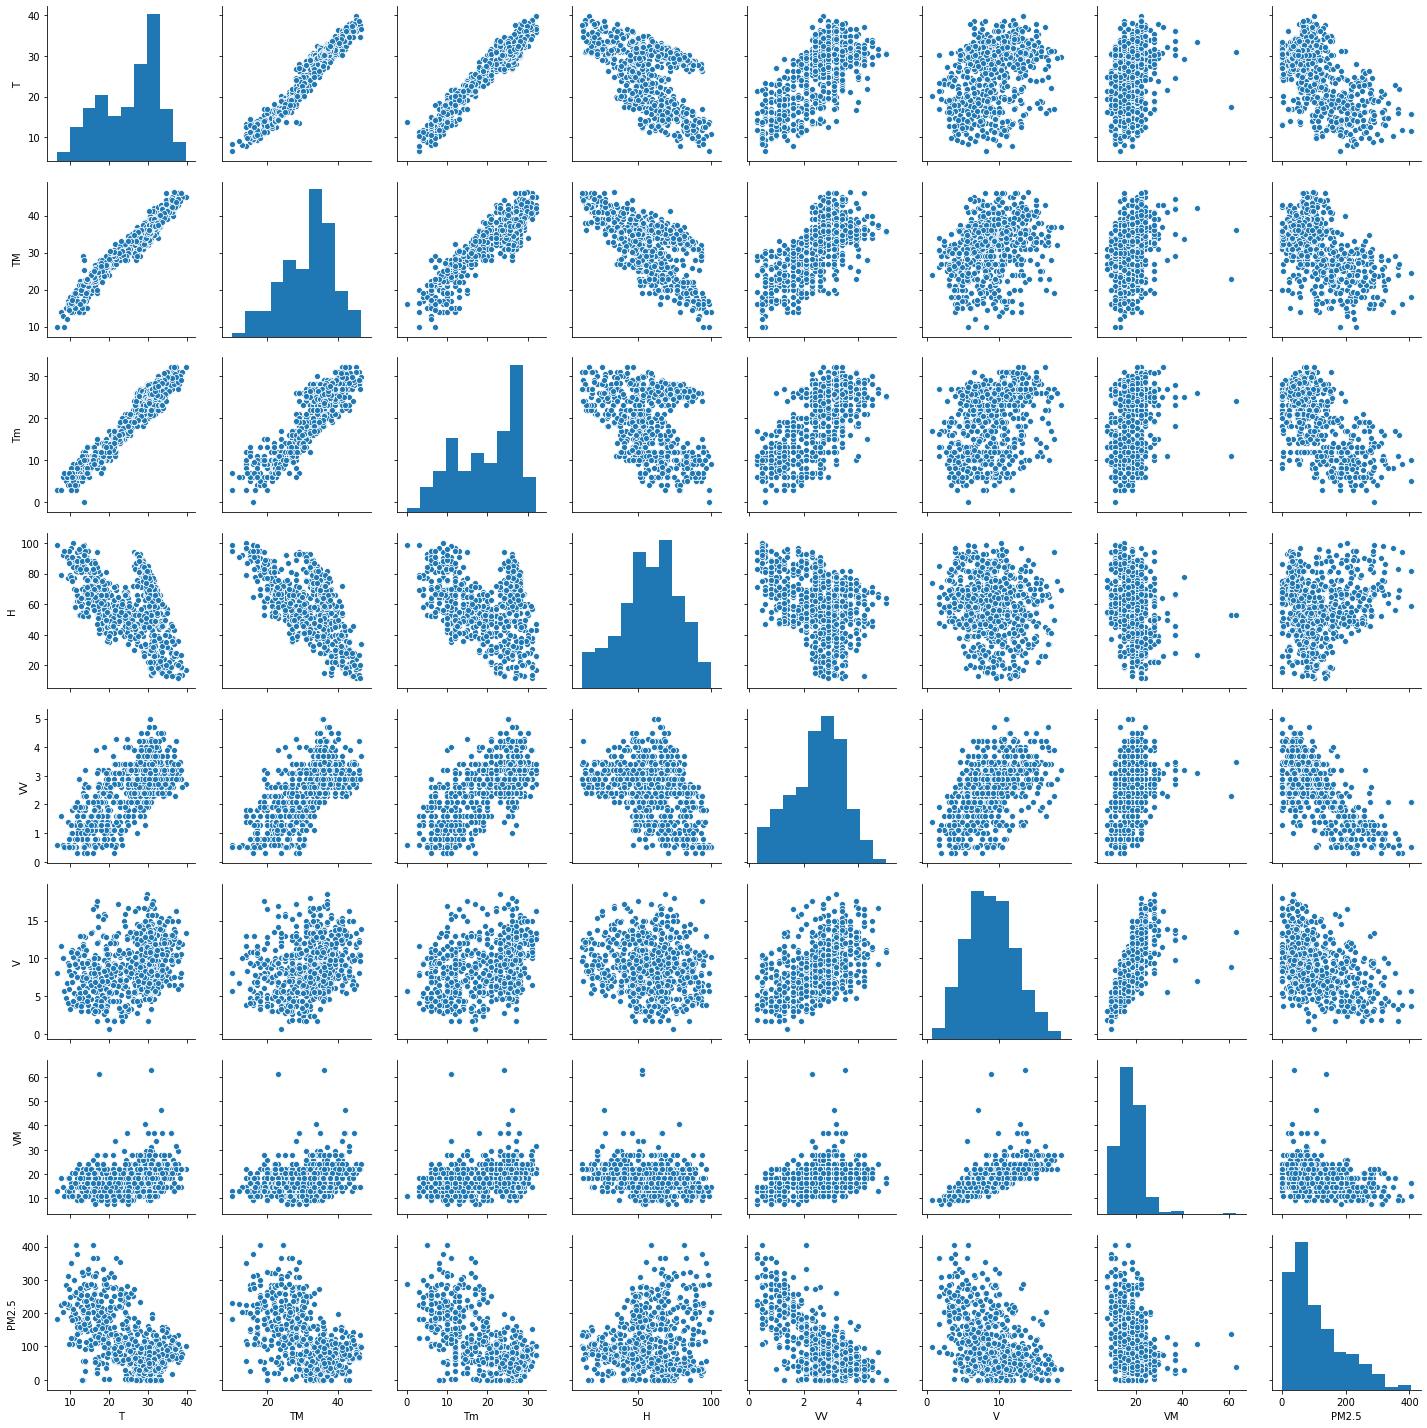

In [29]:
# We check the multi-colinearaty
sns.pairplot(df)

In [30]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1.000000,0.966113,0.961494,-0.500630,0.700793,0.334792,0.299298,-0.617947
TM,0.966113,1.000000,0.882549,-0.625376,0.668075,0.287183,0.301585,-0.543582
Tm,0.961494,0.882549,1.000000,-0.292785,0.671339,0.360736,0.274944,-0.652719
H,-0.500630,-0.625376,-0.292785,1.000000,-0.383258,-0.137045,-0.252076,0.103582
VV,0.700793,0.668075,0.671339,-0.383258,1.000000,0.510676,0.414605,-0.713561
V,0.334792,0.287183,0.360736,-0.137045,0.510676,1.000000,0.680105,-0.454184
VM,0.299298,0.301585,0.274944,-0.252076,0.414605,0.680105,1.000000,-0.352206
PM2.5,-0.617947,-0.543582,-0.652719,0.103582,-0.713561,-0.454184,-0.352206,1.000000


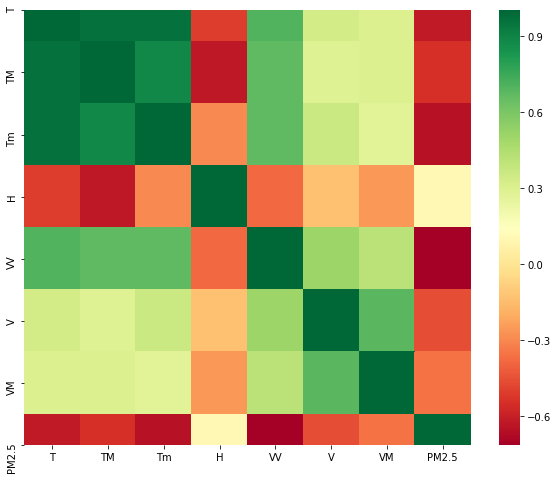

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap='RdYlGn')

In [39]:
y.shape

(742,)

In [40]:
#Other way for feature selection is by Extra tree regressor ensembling technique hence 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [41]:
#This shows how much which categoreis has importance over output variable
model.feature_importances_

array([0.14407398, 0.08526926, 0.20407118, 0.08622344, 0.36276738,
       0.07398286, 0.04361189])

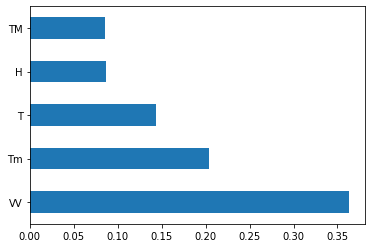

In [52]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

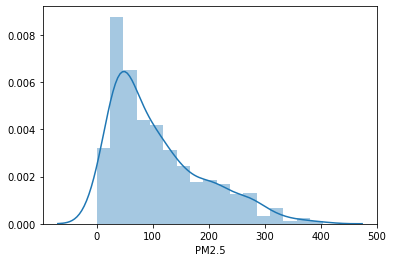

In [57]:
sns.distplot(y)
# It shows that the dependent feature is right skewed

In [58]:
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [63]:
print('Coefficient of detremination is {}'.format(metrics.r2_score(y_test, y_pred)))

Coefficient of detremination is 0.5790611370644787


In [65]:
# Checking accuracy over cross validation 
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv = 5)

In [67]:
score.mean()

0.5595007902839793

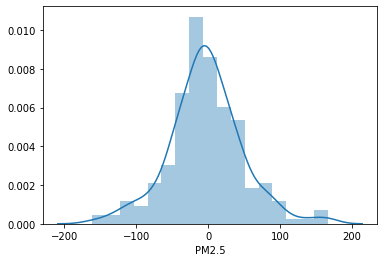

In [70]:
sns.distplot(y_test-y_pred)

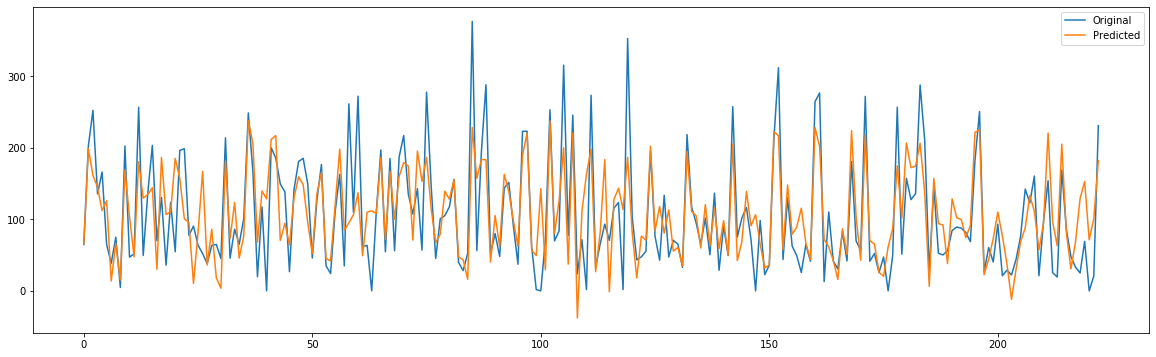

In [80]:
plt.figure(figsize = (20,6))
c=[i for i in range(len(y_test))]
plt.plot(c,y_test,label="Original")
plt.plot(c, y_pred, label = 'Predicted')
plt.legend(loc='best')

In [81]:
import pickle

In [ ]:
file = open('regression.pkl', 'wb')
pickle.dump